<a href="https://colab.research.google.com/github/erlanggadewa/Sentiment-Analysis-Review-Steam/blob/main/bert/non-transform/1e-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visit **ChrisMcCormickAI** on YouTube for more explanation.
[Image Reference](https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP#scrollTo=86C9objaKu8f)

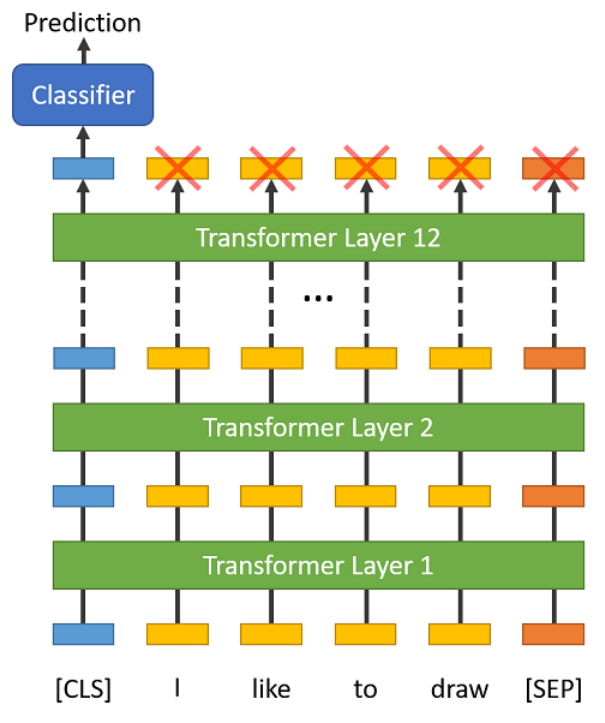

## **1. Cek resource**

In [115]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [116]:
!pip install transformers

In [117]:
!pip install wget

## **2. Download & load dataset**

In [118]:
import wget
import os

print("Downloading dataset...")

url = 'https://github.com/erlanggadewa/Sentiment-Analysis-Review-Steam/releases/download/production/gab-sentiment.csv'

if not os.path.exists('./dataset.csv'):
  wget.download(url, './dataset.csv')

In [119]:
import pandas as pd

df = pd.read_csv("./dataset.csv", delimiter=',')
df.shape

(10000, 3)

In [120]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the punkt_tab resource, which was likely missing
nltk.download('punkt_tab')


# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# 0. Convert to String
def convert_to_string(text):
    return str(text)

# 1. Punctuation Removal
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# 2. Case Folding
def case_folding(text):
    return text.lower()

# 3. Stopword Removal and Lemmatization
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in word_tokens if word not in stop_words]
    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    # Convert list of words back to string
    return ' '.join(lemmatized_words)

# Full preprocessing pipeline
def full_preprocessing(text):
    text = convert_to_string(text)
    text = remove_punctuation(text)
    text = case_folding(text)
    # text = preprocess_text(text)  # Process text: remove stopwords and lemmatize
    return text

# Apply preprocessing to your dataframe
df["review"] = df["review"].apply(full_preprocessing)

# Save the final processed text to a CSV file
df.to_csv("clean-dataset.csv", index=False)
df = pd.read_csv("clean-dataset.csv", delimiter=",")
df.sample(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,label,sentiment,review
6252,Positive,1,dark souls best game im a fanboi yeet 2010
4684,Negative,0,unfortunately unplayable with a 1070 for me
1731,Negative,0,i beat the game and i was like that was it
4742,Negative,0,very hard game play only if youre a masochist
4521,Negative,0,this is one of the most overrated games that i...


In [121]:
# import pandas as pd
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer

# nltk.download("stopwords")

# # Inisialisasi stemmer
# stemmer = PorterStemmer()
# stop_words = set(stopwords.words("english"))


# def cleansing(text):
#     if not isinstance(text, str):
#         text = str(text)
#     # Hapus karakter non-ASCII
#     text = re.sub(r"[^\x00-\x7F]+", "", text)
#     # Hapus tanda baca & simbol
#     text = re.sub(r"[^\w\s.,]", "", text)
#     text = " ".join(text.split())
#     return text

# # Fungsi preprocessing teks
# def preprocess_text(text):
#     text = cleansing(text)
#     return text


# # Contoh dataset

# df["sentiment"] = df["label"].map({"Positive": 1, "Negative": 0})
# df["review"] = df["review"].apply(preprocess_text)
# df.sample(5)

# # Ekspor DataFrame ke file CSV
# df.to_csv("clean-mini-dataset.csv", index=False)
# df = pd.read_csv("./clean-mini-dataset.csv", delimiter=",")

<ipython-input-122-3638a25a03c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#F55','#5A9'])  # Use countplot for direct label counts with custom colors


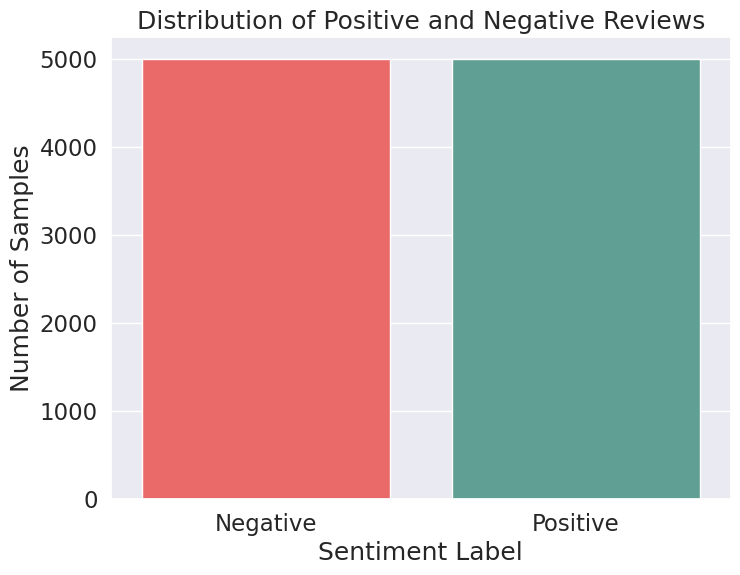

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the distribution of labels with clearer visualization
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.countplot(x='label', data=df, palette=['#F55','#5A9'])  # Use countplot for direct label counts with custom colors
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Samples')
plt.show()


In [123]:
sentences = df.review.values
labels = df.label.values
sentiments = df.sentiment.values

## **3. Load BERT Tokenizer**

In [124]:
from transformers import BertTokenizer

print("Loading BERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT Tokenizer


In [125]:
df.sample(5)

,label,sentiment,review
6366,Positive,1,didnt think it would suck
9628,Positive,1,so unique it delights and indulges the player ...
5916,Positive,1,best game series ever
681,Negative,0,coop doesnt work
5459,Positive,1,after 154 hours and all achievements cleared i...


In [126]:
print("Original: ", sentences[0])

print("Tokenized: ", tokenizer.tokenize(sentences[0]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


Original:   tutorial show key prompts for the xbox controller even though im using mk game crashed every single time no matter what when i reached the first bonfire  asked for refund if the game is properly patched i might try it again
Tokenized:  ['tutor', '##ial', 'show', 'key', 'prompt', '##s', 'for', 'the', 'xbox', 'controller', 'even', 'though', 'im', 'using', 'mk', 'game', 'crashed', 'every', 'single', 'time', 'no', 'matter', 'what', 'when', 'i', 'reached', 'the', 'first', 'bonfire', 'asked', 'for', 'ref', '##und', 'if', 'the', 'game', 'is', 'properly', 'patch', '##ed', 'i', 'might', 'try', 'it', 'again']
Token IDS:  [14924, 4818, 2265, 3145, 25732, 2015, 2005, 1996, 12202, 11486, 2130, 2295, 10047, 2478, 12395, 2208, 8007, 2296, 2309, 2051, 2053, 3043, 2054, 2043, 1045, 2584, 1996, 2034, 28698, 2356, 2005, 25416, 8630, 2065, 1996, 2208, 2003, 7919, 8983, 2098, 1045, 2453, 3046, 2009, 2153]


In [127]:
input_ids = []

for sent in sentences:
  # Check if sent is not nan before encoding
  if isinstance(sent, str) and sent != 'nan':
    encoded_sent = tokenizer.encode(
        sent,
        add_special_tokens = True
    )
    input_ids.append(encoded_sent)

print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (779 > 512). Running this sequence through the model will result in indexing errors


Original:   tutorial show key prompts for the xbox controller even though im using mk game crashed every single time no matter what when i reached the first bonfire  asked for refund if the game is properly patched i might try it again
Token IDs:  [101, 14924, 4818, 2265, 3145, 25732, 2015, 2005, 1996, 12202, 11486, 2130, 2295, 10047, 2478, 12395, 2208, 8007, 2296, 2309, 2051, 2053, 3043, 2054, 2043, 1045, 2584, 1996, 2034, 28698, 2356, 2005, 25416, 8630, 2065, 1996, 2208, 2003, 7919, 8983, 2098, 1045, 2453, 3046, 2009, 2153, 102]


In [128]:
def average(lst):
  """Calculates the average of a list of numbers.

  Args:
    lst: A list of numbers.

  Returns:
    The average of the numbers in the list.
  """
  return sum(lst) / len(lst)

print("Avg sentence length: ", average([len(sen) for sen in input_ids]))

Avg sentence length:  100.9232


In [129]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 64

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 64 values
Padding token: "[PAD]", ID: 0
Done


In [130]:
input_ids[80]

array([  101,  2355,  2145,  2053, 11486,  2490,  3602,  2672,  2490,
        2070, 11486, 11233,  2001, 10958,  6290, 25653, 19392,   102,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [131]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)


## **4. Persiapkan data**

In [132]:
from sklearn.model_selection import train_test_split

# Make sure input_ids and sentiments have the same length
num_samples = min(len(input_ids), len(sentiments))
input_ids = input_ids[:num_samples]
sentiments = sentiments[:num_samples]

train_input, test_input, train_sentiments, test_sentiments = train_test_split(input_ids,
                                                                      sentiments,
                                                                      random_state=2017,
                                                                      test_size=0.1
                                                                      )
train_mask, test_mask, _, _ = train_test_split(attention_mask,
                                               sentiments,
                                               random_state=2017,
                                               test_size=0.1
                                               )

train_input, validation_input, train_sentiments, validation_sentiments = train_test_split(train_input,
                                                                                  train_sentiments,
                                                                                  random_state=2017,
                                                                                  test_size=0.15)

train_mask, validation_mask, _, _ = train_test_split(train_mask,
                                                     train_mask,
                                                     random_state=2017,
                                                     test_size=0.15)

<ipython-input-133-6b5835b518d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#5A9', '#F55'])  # Use countplot for direct label counts with custom colors


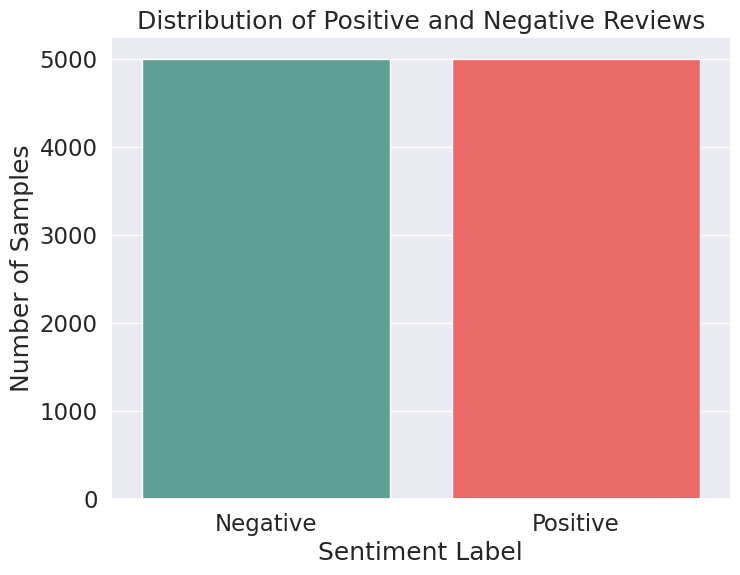

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of labels with clearer visualization
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.countplot(x='label', data=df, palette=['#5A9', '#F55'])  # Use countplot for direct label counts with custom colors
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Samples')
plt.show()


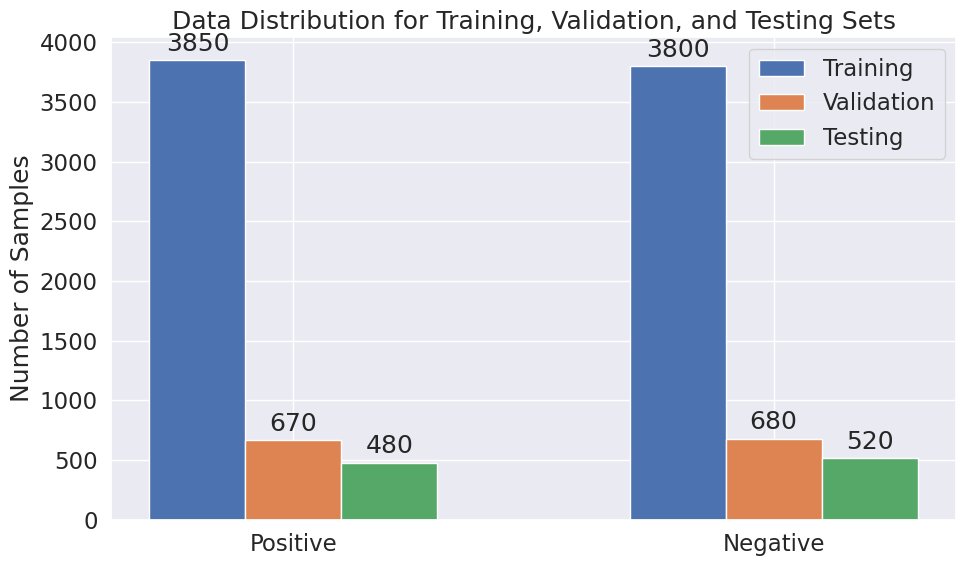

In [134]:

import matplotlib.pyplot as plt
import numpy as np


# Data for the plot (replace with your actual data)
data = {
    'Training': {'Positive': len(train_sentiments[train_sentiments == 1]), 'Negative': len(train_sentiments[train_sentiments == 0])},
    'Validation': {'Positive': len(validation_sentiments[validation_sentiments == 1]), 'Negative': len(validation_sentiments[validation_sentiments == 0])},
    'Testing': {'Positive': len(test_sentiments[test_sentiments == 1]), 'Negative': len(test_sentiments[test_sentiments == 0])}
}

# Create the bar plot
labels = ['Positive', 'Negative']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, data['Training'].values(), width, label='Training')
rects2 = ax.bar(x, data['Validation'].values(), width, label='Validation')
rects3 = ax.bar(x + width, data['Testing'].values(), width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Samples')
ax.set_title('Data Distribution for Training, Validation, and Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [135]:

# Calculate the number of samples for each label in each dataset
train_df = pd.DataFrame({'label': train_sentiments})
validation_df = pd.DataFrame({'label': validation_sentiments})
test_df = pd.DataFrame({'label': test_sentiments})

train_counts = train_df['label'].value_counts()
validation_counts = validation_df['label'].value_counts()
test_counts = test_df['label'].value_counts()


# Print the counts for each dataset
print("Training Data:")
print(train_counts)
print("\nValidation Data:")
print(validation_counts)
print("\nTesting Data:")
print(test_counts)

# Create a summary table
summary_data = {'Dataset': ['Training', 'Validation', 'Testing'],
                'Positive': [train_counts.get(1, 0), validation_counts.get(1, 0), test_counts.get(1, 0)],
                'Negative': [train_counts.get(0, 0), validation_counts.get(0, 0), test_counts.get(0, 0)]}
summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
summary_df

Training Data:
label
1    3850
0    3800
Name: count, dtype: int64

Validation Data:
label
0    680
1    670
Name: count, dtype: int64

Testing Data:
label
0    520
1    480
Name: count, dtype: int64

Summary Table:


,Dataset,Positive,Negative
0,Training,3850,3800
1,Validation,670,680
2,Testing,480,520


In [136]:
train_input = torch.tensor(train_input)
train_sentiments = torch.tensor(train_sentiments)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_sentiments = torch.tensor(validation_sentiments)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_sentiments = torch.tensor(test_sentiments)
test_mask = torch.tensor(test_mask)

In [137]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 256

train_data = TensorDataset(train_input, train_mask, train_sentiments)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_sentiments)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_sentiments)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

## **5. Persiapkan model pre-trained BERT**

In [138]:
from transformers import BertForSequenceClassification, BertConfig
from torch.optim import AdamW # Import AdamW from torch.optim

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (30522, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.e

In [140]:
learning_rate = 1e-5;
optimizer = AdamW(
    model.parameters(),
    lr = learning_rate,
    eps = 1e-8
)

In [141]:
from transformers import get_linear_schedule_with_warmup

epochs = 10

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

In [142]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [143]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## **6. Training BERT**

In [144]:
import random
import time
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []
validation_accuracies = []
test_accuracies = []

total_training_time = 0
model.to(device)

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  # For each batch of training data
  for step, batch in enumerate(train_dataloader):

    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  epoch_training_time = time.time() - t0
  total_training_time += epoch_training_time

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(epoch_training_time)))

  # ===================================
  #             Validation
  # ===================================

  print("\nRunning Validation...")

  t0 = time.time()

  model.eval()

  eval_accuracy = 0
  nb_eval_steps = 0

  all_preds_val = []
  all_labels_val = []

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1

    # Collecting predictions and labels for confusion matrix
    preds = np.argmax(logits, axis=1)
    all_preds_val.extend(preds)
    all_labels_val.extend(label_ids)

  avg_val_accuracy = eval_accuracy / nb_eval_steps
  validation_accuracies.append(avg_val_accuracy)

  # Confusion Matrix
  print(classification_report(all_labels_val, all_preds_val))

  print("   Accuracy: {0:.2f}".format(avg_val_accuracy))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Testing
  # ===================================

  print("\nRunning Testing...")

  t0 = time.time()
  model.eval()

  test_accuracy = 0
  nb_test_steps = 0

  all_preds_test = []
  all_labels_test = []

  for batch in test_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_test_accuracy = flat_accuracy(logits, label_ids)

    test_accuracy += tmp_test_accuracy

    nb_test_steps += 1

    # Collecting predictions and labels for confusion matrix
    preds = np.argmax(logits, axis=1)
    all_preds_test.extend(preds)
    all_labels_test.extend(label_ids)

  avg_test_accuracy = test_accuracy / nb_test_steps
  test_accuracies.append(avg_test_accuracy)

  # Confusion Matrix
  print(classification_report(all_labels_test, all_preds_test))

  print("   Test Accuracy: {0:.2f}".format(avg_test_accuracy))
  print("   Testing took: {:}\n".format(format_time(time.time() - t0)))

print("Training complete!")
print("Total training time: {:}".format(format_time(total_training_time)))


======= Epoch 1 / 10 =======
Training...
   Average training loss: 0.61
   Training epoch took: 0:01:04

Running Validation...
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       680
           1       0.84      0.80      0.82       670

    accuracy                           0.82      1350
   macro avg       0.82      0.82      0.82      1350
weighted avg       0.82      0.82      0.82      1350

   Accuracy: 0.82
   Validation took: 0:00:05

Running Testing...
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       520
           1       0.85      0.80      0.83       480

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

   Test Accuracy: 0.84
   Testing took: 0:00:03

======= Epoch 2 / 10 =======
Training...
   Average training loss: 0.35
   Training epoch took: 0:01:06


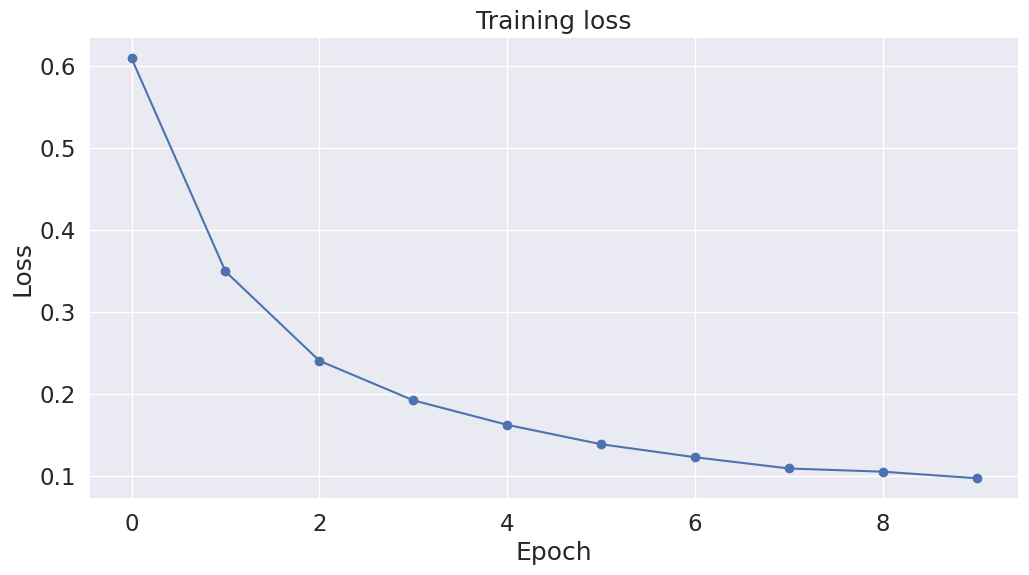

In [145]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## **7. Predict dan Evaluate**

In [146]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 1,000 test sentences
 DONE.


In [147]:
from sklearn.metrics import matthews_corrcoef

flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.820


In [148]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)


ACC: 0.910



Hyperparameters:
- Learning Rate: 1e-05
- Batch Size: 256
- Epochs: 10
MCC: 0.82
ACC: 0.91
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       520
           1       0.90      0.91      0.91       480

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



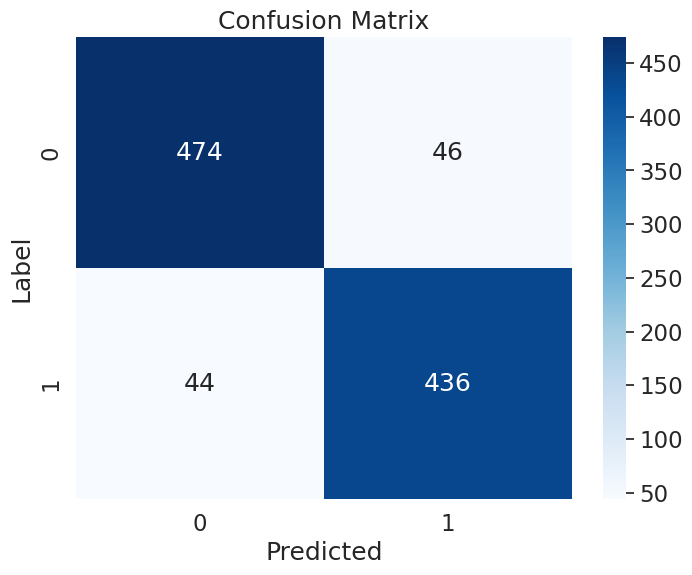

In [149]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Additional information you might want to display:
# * Training time per epoch
# * Hyperparameters used (learning rate, batch size, epochs, etc.)
# * Number of training examples
# * Number of validation examples
# * Number of test examples
# * Model architecture details
# * Other relevant metrics, e.g., precision, recall, F1-score (if applicable)

# Example of displaying hyperparameters
print("\nHyperparameters:")
print(f"- Learning Rate: {learning_rate}")  # Replace with your actual learning rate
print(f"- Batch Size: {batch_size}") # Replace with your actual batch size
print(f"- Epochs: {epochs}") # Replace with your actual epoch number

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)
print("MCC: %.2f" % mcc)

acc = accuracy_score(flat_true_labels, flat_prediction)
print("ACC: %.2f" % acc)

# Generate classification report
print(classification_report(flat_true_labels, flat_prediction))

# Generate and plot confusion matrix
cm = confusion_matrix(flat_true_labels, flat_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Label")
plt.title("Confusion Matrix")
plt.show()